# Testing K-Mer for nucleotide sequences

In [8]:
# imports
from sklearn.preprocessing import StandardScaler
from si.io_package.csv_file import read_csv
from si.feature_extraction.k_mer import KMer
from si.model_selection.split import train_test_split
from si.linear_model.logistic_regression import LogisticRegression

In [9]:
filename_tfbs = "C:/Users/Ana/Documents/GitHub/mbioinf-sib/datasets/tfbs.csv"
tfbs = read_csv(filename_tfbs, features=True, label=True)
tfbs.print_dataframe()

,sequence
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
0,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
0,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
1,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
1,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
...,...
0,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1,GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
0,ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1,TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...


In [10]:
k_mer = KMer(k=3, alphabet='DNA')

In [11]:
kmer_dataset = k_mer.fit_transform(tfbs)

In [12]:
kmer_dataset.print_dataframe()

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,GCT,GCG,GTA,GTC,GTT,GTG,GGA,GGC,GGT,GGG
0,0.00,0.02,0.00,0.02,0.02,0.04,0.00,0.00,0.00,0.00,...,0.04,0.02,0.00,0.00,0.04,0.00,0.04,0.04,0.02,0.06
0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.00,0.06,0.02,0.04,0.06,0.02,0.00,0.02,0.02,0.00
0,0.04,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.02,0.04
1,0.00,0.02,0.00,0.00,0.00,0.10,0.02,0.02,0.00,0.00,...,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.08,0.00,0.00,0.00,0.04,0.06,0.00,0.04,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.06,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.02
1,0.00,0.02,0.02,0.00,0.00,0.02,0.04,0.00,0.02,0.00,...,0.00,0.02,0.04,0.02,0.04,0.00,0.00,0.00,0.00,0.00
0,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.02,0.00,...,0.02,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.04,0.04
1,0.02,0.02,0.02,0.02,0.00,0.04,0.02,0.00,0.02,0.00,...,0.00,0.04,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.04


In [13]:
kmer_dataset.x = StandardScaler().fit_transform(kmer_dataset.X)

In [14]:
train, test = train_test_split(kmer_dataset)

In [19]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(train)
lg_model.score(test)

0.5125

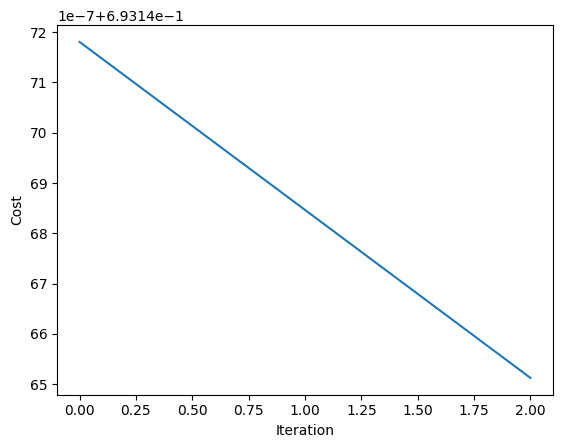

In [18]:
lg_model.plot_cost_history()

Composição peptídica em scripts/evaluation_exercises/eval8.ipynb